<a href="https://colab.research.google.com/github/bcylincoln/ENGS-108-Fall-23-assignment_2_Fall2023-Rebecca/blob/main/assignment_2_Fall2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ENGS 108 Fall 2023 Assignment 2**

*Due TBD at 11:59PM on Github*

**Instructors:** George Cybenko

**TAs:** Ganesh Rohit Nirogi, Diksha Bubna, Sunishka Jain, Kushagra Rawat


---

## **Rules and Requirements**


1.   You are only allowed to use Python packages that are explicity imported in
the assignment notebook or are standard (bultin) python libraries like random, os, sys, etc, (Standard Bultin Python libraries will have a Python.org documentation). For this assignment you may use:
  *   [numpy](https://numpy.org/doc/stable/)
  *   [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)
  *   [scikit-learn](https://scikit-learn.org/stable/)
  *   [matplotlib](https://matplotlib.org/)

2.   All code must be fit into the designated code or text blocks in the assignment notebook. They are indentified by a **TODO** qualifier.

3. For analytical questions that don't require code, type your answer cleanly in Markdown. For help, see the [Google Colab Markdown Guide](https://colab.research.google.com/notebooks/markdown_guide.ipynb).

---


In [ ]:
''' Import Statements '''
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from copy import deepcopy
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier
from scipy import signal
import matplotlib.collections as collections




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Loading**
Upload the red and synthetic datasets to your google colab session using Google Drive. Read the following [tutorial](https://github.com/Thayer-ENGS108/Assignment_2_Fall2022) for how to get setup.

In [ ]:
#TODO: Set your base datasets path. This is my base path, you will need to change to match yours.
dataset_base_path = '/content/drive/MyDrive/applied ml/assignment1/datasets'

In [ ]:
#-- Everything else you should not need to change.
import os
import pickle

#-- Gather paths
synth_data_path = os.path.join(dataset_base_path, 'assign_2_synth_data.pk')
red_train_path = os.path.join(dataset_base_path, 'red_train.csv')
red_valid_path = os.path.join(dataset_base_path, 'red_valid.csv')
red_test_path = os.path.join(dataset_base_path, 'red_test.csv')
synth_train_path = os.path.join(dataset_base_path, 'synth_train.csv')
synth_valid_path = os.path.join(dataset_base_path, 'synth_valid.csv')
synth_test_path = os.path.join(dataset_base_path, 'synth_test.csv')

#-- Load Synth_Data
with open(synth_data_path, 'rb') as f_:
  synth_data = pickle.load(f_)

#-- Load Red Wine Data
red_train_df = pd.read_csv(red_train_path)
red_valid_df = pd.read_csv(red_valid_path)
red_test_df = pd.read_csv(red_test_path)
synth_train_df = pd.read_csv(synth_train_path)
synth_valid_df = pd.read_csv(synth_valid_path)
synth_test_df = pd.read_csv(synth_test_path)

#-- Data is stored in a tuple of format (X, y) and are already converted to numpy arrays.
red_train = (red_train_df.drop('quality', axis=1).to_numpy(), red_train_df['quality'].to_numpy())
red_valid = (red_valid_df.drop('quality', axis=1).to_numpy(), red_valid_df['quality'].to_numpy())
red_test = (red_test_df.drop('quality', axis=1).to_numpy(), red_test_df['quality'].to_numpy())

#-- Load in Synth train, valid, test data with tuple format (X, y)
synth_train = (synth_train_df.drop('y', axis=1).to_numpy(), synth_train_df['y'].to_numpy())
synth_valid = (synth_valid_df.drop('y', axis=1).to_numpy(), synth_valid_df['y'].to_numpy())
synth_test = (synth_test_df.drop('y', axis=1).to_numpy(), synth_test_df['y'].to_numpy())

## **Problem 1: $K$-Means Clustering**
In this problem, you will solve a clustering
task using the k-means algorithm and an associated classification task using $k$ nearest neighbors algorithm, both of which you learned in class. The dataset for this problem is a synthetic two-dimensional dataset *synth_data*. Each entry has two features $(x_1, x_2)$.
>
> **Part 1** A reasonable first step in every machine learning task is to understand the dataset at hand. Proceed to explore this problem’s dataset by addressing the following:
>> **(a)** Choose a suitable type of plot and visualize the training data.

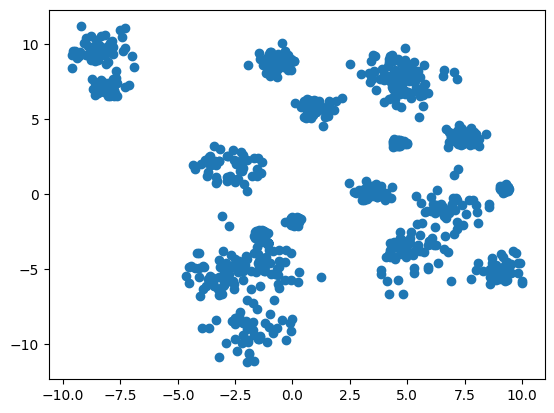

In [ ]:
#TODO: Write your code here. Use matplotlib for visualization.
plt.scatter(synth_data[:,0], synth_data[:,1])
plt.show()

>> **(b)** From your plot, how many clusters, $k$, would you estimate are represented in the dataset?

11 clusters


> **Part 2** Build a model.
>> **(a)** Using the k-Means algorithm, implement a clustering model. *Hint: Use [scikit-learn's K-means library](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).*

In [ ]:
#TODO: Write your code here. Hint: Just define a model, don't train yet.
# NA: scikit K-means needs to be initialized with k set, so I just do this in the next function

>> **(b)** Train the clustering model on several reasonable values of $k$, taking into account your visual inspection from 1b. Plot the sum of distance (SSE) from each data point and its respective cluster for 10 different values of $k$.

In [ ]:
def train(k, dataset):
  ''' Using your model above, implement a function that will train your K-means
  for different values of k on your dataset and return the trained model'''
  kmeans = KMeans(n_clusters=k, n_init='auto')
  kmeans.fit(dataset)
  return kmeans

In [ ]:
def calculateSSE(model):
  ''' Using a trained model calculate the SSE for the model '''
  return model.inertia_

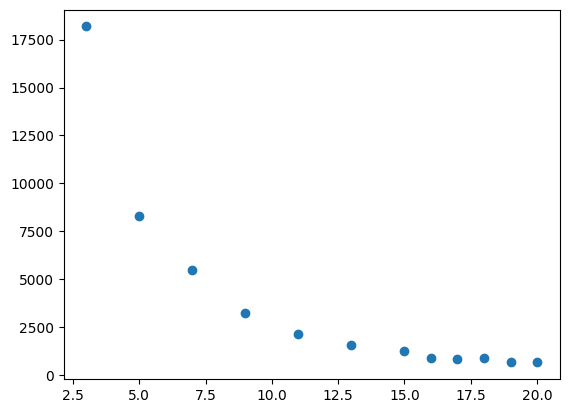

In [ ]:
#TODO: Choose 10 different values of k based on your inspection and plot the SSE scores.
scores = []
for k in [3, 5, 7, 9, 11, 13, 15, 16, 17, 18, 19, 20]:
  m = train(k, synth_data)
  sse = calculateSSE(m)
  scores.append([k, sse])
arr = np.array(scores)
plt.scatter(arr[:,0], arr[:,1])
plt.show()

>> **(c)** What value of $k$ is optimal? How does it compare to your visual inspection?


19 seems optimal since it's the lowest number of clusters in the section where the plot flattens out, minimizing SSE. This is higher than I'd guessed on visual inspection.



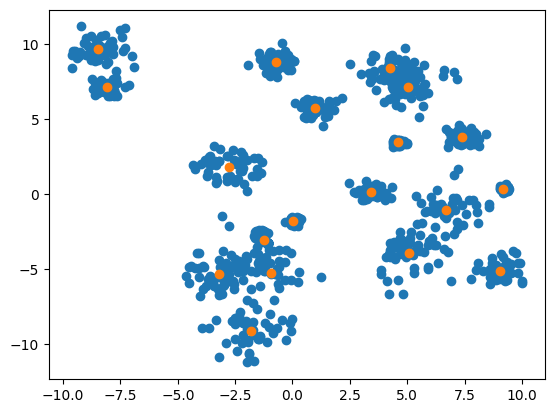

In [ ]:
model = train(19, synth_data)
plt.scatter(synth_data[:,0], synth_data[:,1])
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1])
plt.show()

# **Problem 2: $k$-NN Classification**
In this problem, you will utilize data deriving
from the same synthetic dataset as above. This time, the data has been separated into *synth_train*, *synth_valid* and *synth_test* arrays. Furthermore, each sample now includes a class label found in the $y$ column. These class labels come from the set $\{1, 2, . . . , 31\}$. *Note: These are not the same datasets as Problem 1.*

> **Part 1** Train an implementation of the $k$-Nearest Neighbors algorithm on the training dataset. Note that $k$ here refers to the number of neighbors, not clusters.

In [ ]:
def train(k, dataset):
  ''' Implement a function that will train a k-NN
  for different values of k on your dataset and return the trained model'''
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(dataset[0], dataset[1])
  return model

> **Part 2** Report the classification accuracy of this model on the validation set for different values for $k$. Plot these accuracies against $k$ and report the optimal value for $k$.

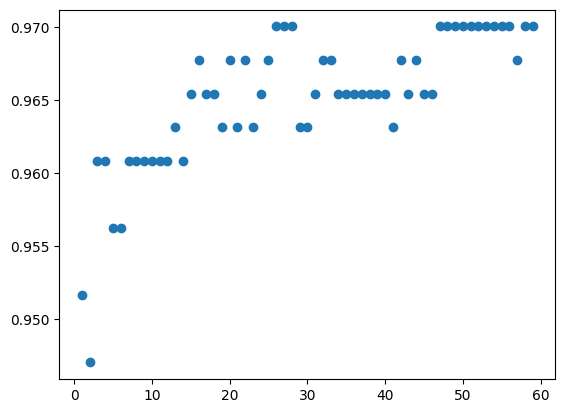

In [ ]:
#TODO: Write your code here.
scores = []
for k in range(1, 60):
  model = train(k, synth_train)
  accuracy = model.score(synth_valid[0], synth_valid[1])
  scores.append([k, accuracy])

arr = np.array(scores)
plt.scatter(arr[:,0], arr[:,1])
plt.show()


The optimal value of k is 28

> **Part 3** Report the classification precision, recall and F1-score of this model on the data in synth test.csv using the optimal value of $k$ that you found in Part 2.

In [ ]:
model = train(28, synth_train)
predictions = model.predict(synth_test[0])
scores = precision_recall_fscore_support(synth_test[1], predictions, average='micro')
print("Precision: ", scores[0])
print("Recall: ", scores[1])
print("F-Score: ", scores[2])


Precision:  0.9795698924731183
Recall:  0.9795698924731183
F-Score:  0.9795698924731183


# **Problem 3: Decision Tree Classification**
In this problem you will use decision
trees to classify the quality of red vinho verde wine samples based on their physicochemical properties. The dataset has been separated into *red_train, red_valid and red_test* arrays. For all of these files, the rightmost column (“quality”) is the target label for each datapoint. All other columns are features.

> **Part 1** First let’s explore the datasets through the following exercises. Note that we cannot plot the data in a meaningful way given that number of features exceed the physical dimensions.

>> **(a)** How many datapoints are in the training, validation, and testing sets?

In [ ]:
#TODO: Write your code here.
print("Training: ", len(red_train[0]))
print("Validation: ", len(red_valid[0]))
print("Testing: ", len(red_test[0]))

Training:  895
Validation:  224
Testing:  480


>> **(b)** How many features are available for each datapoint?

In [ ]:
#TODO: Write your code here.
red_train[0].shape[1]

11

>> **(c)** What are the average *alcohol* and *pH* values for *training* samples?

In [ ]:
#TODO: Write your code here.
red_train_df.info() # pH is column 8
print()
print("The average is:", red_train[0][:,8].mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         895 non-null    float64
 1   volatile acidity      895 non-null    float64
 2   citric acid           895 non-null    float64
 3   residual sugar        895 non-null    float64
 4   chlorides             895 non-null    float64
 5   free sulfur dioxide   895 non-null    float64
 6   total sulfur dioxide  895 non-null    float64
 7   density               895 non-null    float64
 8   pH                    895 non-null    float64
 9   sulphates             895 non-null    float64
 10  alcohol               895 non-null    float64
 11  quality               895 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 84.0 KB

The average is: 3.309541899441341


> **Part 2** Decision Trees.

>> **(a)** Implement a binary decision tree model for the training data. *Hint: Try looking at the [scikit-learn decision tree library](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier).*

In [ ]:
def train(dataset, max_depth=None):
  ''' Implement a function that will train a decision tree model
  on your dataset and return the trained model'''
  model = DecisionTreeClassifier(max_depth=max_depth)
  model.fit(red_train[0], red_train[1])
  return model

>> **(b)** There are a number of hyperparameters that can be tuned to improve your model, one of which is the criteria for ending the splitting process. Two common ways of terminating the splitting process are *maximum depth* of the tree or *minimum number of samples* left. Tune the *maximum depth* of the tree by reporting the accuracy of the classifier in 2a on the validation set for different settings of *maximum depth*. Plot your findings.

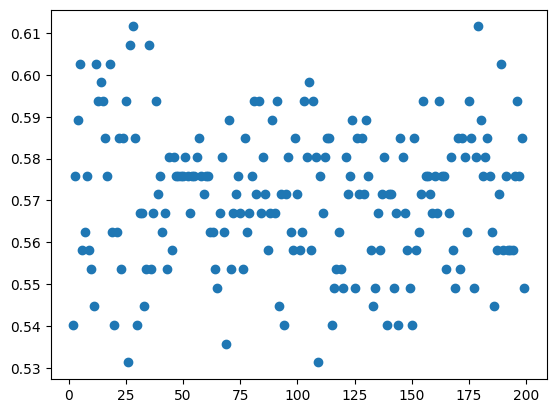

[28, 0.6116071428571429]


In [ ]:
scores = []
for k in range(2, 200):
  model = train(red_train, k)
  accuracy = model.score(red_valid[0], red_valid[1])
  scores.append([k, accuracy])

arr = np.array(scores)
plt.scatter(arr[:,0], arr[:,1])
plt.show()

print(max(scores, key=lambda x: x[1]))

>> **(c)** Use the optimum setting of *maximum depth* found in 2b to report the accuracy of the classifier on the *test* dataset.

In [ ]:
model = train(red_train, 73)
print("Accuracy: ", model.score(red_test[0], red_test[1]))

Accuracy:  0.5645833333333333


# **Problem 4: Systems - Estimating ODE Parameters**

Many real-world systems can be modelled by linear diffferential equations. Some of the most common examples are mechanical and electrical oscillations (see mass-spring example below) which can be described by the solution of an initial value problem of the form:

$$𝑎𝑥″+𝑏𝑥′+𝑐𝑥=𝑔(𝑡)  \tag{1}$$    

, where initial condition are given by:       $𝑥(0)=𝑥0$,   $𝑥′(0)=𝑥′0$                    

For our problems, we will assume that $g(t) = 0$, no external force (for spring system etc)

![Url](https://benmoseley.blog/wp-content/uploads/2021/08/oscillator.gif)


>**Part 1** Lets generate some synthetic data using an ODE for a vibration with no damping in chapter 3.7 Example 4 (Source: Elementary Differential Equations and Boundary Value Problems by Boyce & DiPrima, Wiley 2017).
In this system, $$ x'' + 0.125x' + x= 0 \tag{2}$$
and the analytical solution is the function below:


In [ ]:
t = np.linspace(0, 30*np.pi, 1000)   # time
x_funct = lambda t: (32/np.sqrt(255))*np.exp(-1*t/16)*np.cos((np.sqrt(255)/16)*t -0.06254)  # function to get x given t

# analytic function x given t
x_analytic = x_funct(t)

>> **(a)** Now lets assume we have observed a noisy sample composed of the first 20% of x_analytic. Create noisy data for the first 20% of x_analytic

In [ ]:
# create t_noisy (time) to record time for the first 20% of t
NOISY_FACTOR = 4 # controls the threshold for adding noise

len_t = int(0.2*len(t))
t_noisy = t[:len_t]

In [ ]:
# TODO: Compute x for the corresponding t_noisy
x =  x_analytic[:len_t]

In [ ]:
# TODO: adding noise
noise = np.array(np.random.random(len_t) - 0.5)/NOISY_FACTOR
x_noisy = x + noise

>>**(b)** Our task in this question is to estimate parameters a, b, and c, assuming that we only observed x_noisy

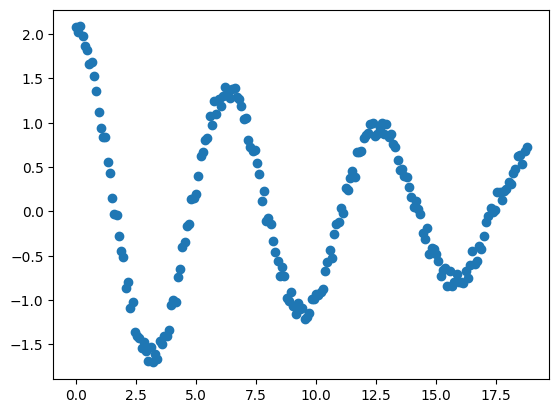

In [ ]:
# TODO: Plot the observed noisy data below (time vs displacement)
plt.scatter(t_noisy, x_noisy)
plt.show()

>> **(c)** Real-world data is often noisy and denoising can help to reduce the noise. Denoise the above data to create x_denoised:

In [ ]:
# denoising
N, Wn = 5, 0.03   # Feel free to modify N and Wn as you see fit!
b, a = signal.butter(N, Wn, analog=False)   # module from scipy
x_denoised = signal.filtfilt(b,a,x_noisy)

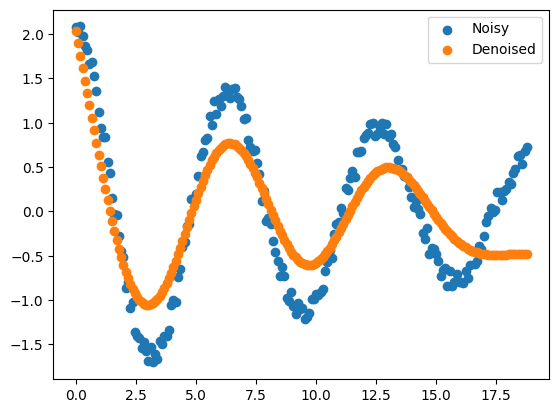

In [ ]:
# TODO: Plot and insert legend to differentiate x_noisy and x_denoised vs time (on same plot)
fig, ax = plt.subplots()
ax.scatter(t_noisy, x_noisy, label="Noisy")
ax.scatter(t_noisy, x_denoised, label="Denoised")
ax.legend()
plt.show()

**Part 2**: Compute derivatives x' and x'' to estimate a, b, and c given x

>>**a** Using the ([forward method (finite difference)](https://en.wikipedia.org/wiki/Finite_difference)).
compute $x'$ and $x''$ for both x_noisy and x_denoised

In [ ]:
#TODO: Complete the function below
def first_derivative(X, dt):
    # approximate derivative using forward nethod
    first_derivative = np.diff(X) / dt
    return first_derivative

In [ ]:
#TODO: Complete the functions below
def second_derivative(X_first, dt):
    # Basically differentiate the first derivative
    second_derivative = np.diff(X_first) / dt
    return second_derivative

In [ ]:
def get_derivatives (X):
    dt = t[1] - t[0] # time difference
    X_prime =  first_derivative(deepcopy(X), dt)
    X_prime_squared = second_derivative(deepcopy(X_prime), dt)
    # adjust to make equal lengths arrays
    return X[2:], X_prime[1:], X_prime_squared


# for noisy data
x, x_prime, x_prime_squared = get_derivatives(x_noisy)

# for denoised data
x1, x_prime1, x_prime_squared1 = get_derivatives(x_denoised)

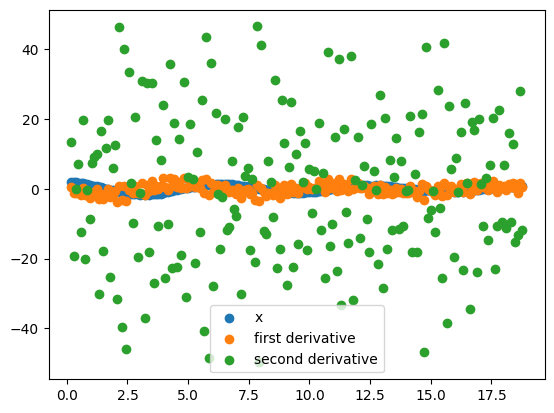

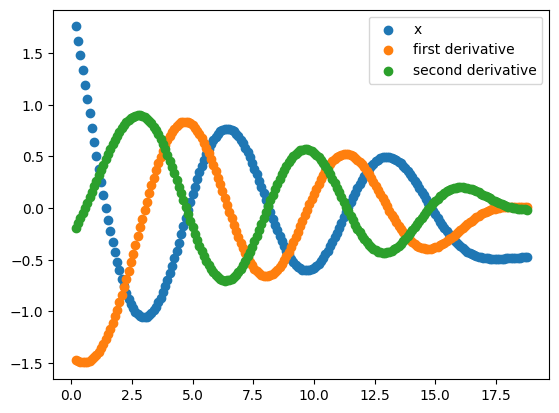

In [ ]:
# TO DO: Fill the function belwo

def plot_figs (x, x_first, x_second):
  fig, ax = plt.subplots()
  ax.scatter(t_noisy[2:], x, label="x")
  ax.scatter(t_noisy[2:], x_first, label="first derivative")
  ax.scatter(t_noisy[2:], x_second, label="second derivative")
  ax.legend()
  plt.show()
    #TD DO: On same graph, plot x, x', x''

 #   return;


plot_figs(x, x_prime, x_prime_squared)
plot_figs(x1, x_prime1, x_prime_squared1)

>>**(b)** How do the derivative plots compare for the noisy vs the denoised samples? Whats the effect of denoising? What happens when we adjust the NOISY_FACTOR (see Part 1a)?

For the noisy samples, the noise in x is amplified by the derivative operation, so that the second derivative is unrecognizable. Denoising removes this effect so that all the derivatives close to the original signal. When we increase NOISY_FACTOR, the first derivative of the noisy signal also begins to lose its form, but the denoising process is effective enough that the derivatives of the denoised signal are still unaffected.

>>**(c)** Now we have x, x' and x''. Since g(t) = 0; we can estimate a, b, and c via regression. If we assume c = 1,
then Equation 1 can be written as:
    
    
$$𝑎𝑥″+𝑏𝑥′ =  -x \tag{3}$$


>>>From Equation 3, we can perform [linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to estimate parameters a and b. Using -x as your dependent variable, and x' and x'' as your independent variables. Train a regression model below:




In [ ]:
#TODO: Fill the function below

def train_model (X, X_first, X_second):
    """ X - original x, X_first - first derivative, X_second - second derivative """

    # TODO: Using Equation 3 with independent variable, (X'' and X'), dependent variable (-X).
    #       Fit a linear regression model
    X = np.stack([X_second, X_first]).T
    y = -x
    model = LinearRegression().fit(X, y)
    # return the regression coefficients and the model (which we will be a and b)
    return model.coef_

# train regression models for the noisy and denoised data
coeff_noisy  = train_model(x, x_prime, x_prime_squared)   # noisy data
coeff_denoised = train_model(x1, x_prime1, x_prime_squared1)   # denoised data

**Part 3**  From the model coefficients, we can identify parameters $a$ and $b$ and we know that $c = 1$. Now, our task is to
predict how good our model can predict the entire dataset.

In [ ]:
a_noisy, b_noisy = coeff_noisy
a_denoised, b_denoised = coeff_denoised

print('For the noisy sample: (a = {}, b = {}, c = 1)'.format(a_noisy, b_noisy))
print('For the denoised sample: (a = {}, b = {}, c = 1)'.format(a_denoised, b_denoised))
print("The analytic solution has (a = 1, b = 0.125, and c = 1)")


For the noisy sample: (a = 7.394828897871723e-05, b = -0.0013318340358406942, c = 1)
For the denoised sample: (a = 1.85127536038519, b = 0.472213245989084, c = 1)
The analytic solution has (a = 1, b = 0.125, and c = 1)


>>**(a)** How do estimated parameters from the noisy and denoised samples compare to the analytic parameters?

The parameters from the denoised sample are closer to the analytic solution, but they aren't close.

>> **(b)** From Equation 3, $$x = -1*(ax'' + bx') \tag{4}$$
We will use this equation to test how good our parameters predict the analytic solution (given x' and x'').

In [ ]:
# get derivatives on entire dataset
X, X_prime, X_prime_squared = get_derivatives(x_analytic)


# TODO: Use Equation 3 to compute X
def compute_x (X_first, X_second, a, b):

    X = -((a * X_second) + (b * X_first))
    return X

# TODO: Predict Y for the noisy sample, and the denoised sample
x_pred_noisy = compute_x(X_prime, X_prime_squared, a_noisy, b_noisy)
x_pred_denoised  = compute_x(X_prime, X_prime_squared, a_denoised, b_denoised)



Text(0, 0.5, 'displacement')

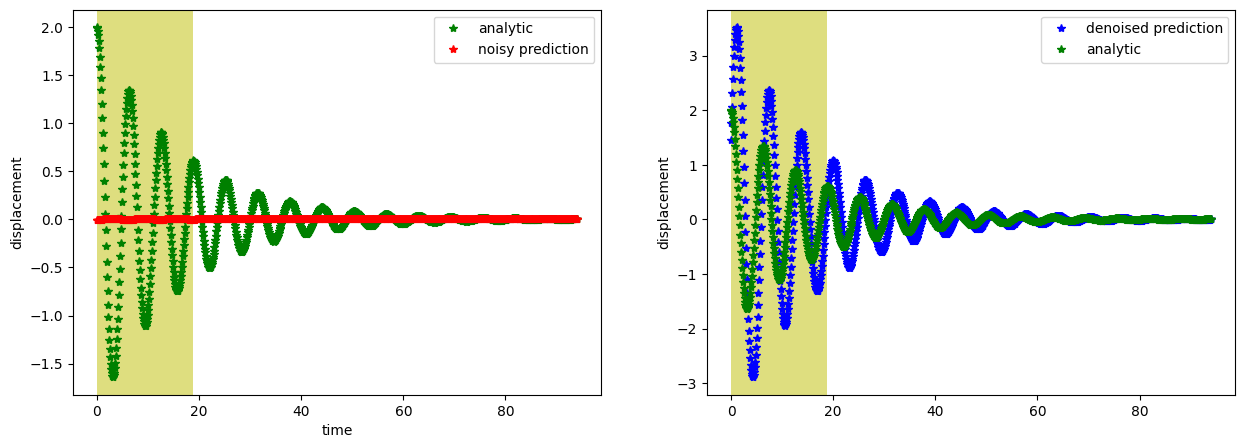

In [ ]:

# adjust t to fit dimensions of predictions
LEN_T = len(t)
t_original = t[:LEN_T-2]
x_original = x_analytic[:LEN_T -2]


# Plots to show how well our parameters fit the data from the analytic solution
fig, axes = plt.subplots(1, 2, figsize = (15, 5))
axes[0].plot(t_original, x_original, '*', color = 'green', label = 'analytic')
axes[0].plot(t_original, x_pred_noisy, '*', color = 'red', label = 'noisy prediction')

axes[1].plot(t_original, x_pred_denoised, '*', color = 'blue', label = 'denoised prediction')
axes[1].plot(t_original, x_original, '*', color = 'green', label = 'analytic')

axes[0].legend()
axes[1].legend()

# This shades the seen part (in creating the model -yellow), but the model
# extends to the unseen white part
axes[0].axvspan(0, t[len_t], color='y', alpha=0.5, lw=0)
axes[1].axvspan(0, t[len_t], color='y', alpha=0.5, lw=0)

axes[0].set_xlabel('time')
axes[0].set_ylabel('displacement')
axes[1].set_ylabel('time')
axes[1].set_ylabel('displacement')


>>**(c)** How do these two plots compare? On the same graph, plot the relative errors to compare how x_pred noisy and x_pred_denoised differ from x_original (if necessary, use a logarithmic scale). $$ RE(true, pred) =|true -pred|/|true|$$ What conclusion do you get from the relative errors?

The predictions are squeezed versions of the analytics function, more so with the noisy prediction. The relative errors of the denoised predictions are sinusoidal, and the noisy errors are more consistent. The denoising process makes it harder to reproduce the original signal.

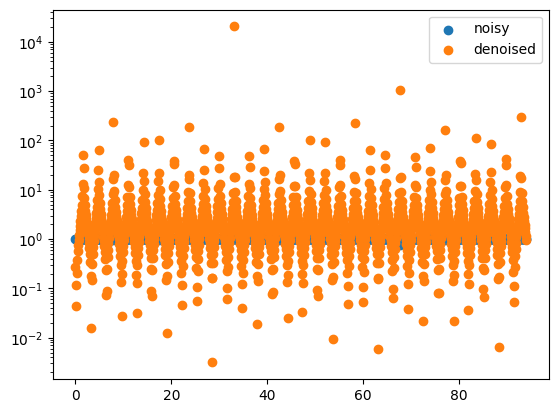

In [ ]:
re_noisy = np.abs(x_original - x_pred_noisy)/np.abs(x_original)
re_denoised = np.abs(x_original - x_pred_denoised)/np.abs(x_original)

fig, axes = plt.subplots()
plt.yscale("log")
axes.scatter(t_original, re_noisy, label="noisy")
axes.scatter(t_original, re_denoised, label="denoised")
axes.legend()
plt.show()

>>**(d)** In real-world scenarios, we often dont have x_analytic but only the noisy sample. How would you ensure if
the parameters you obtained are good enough if you only have x_noisy?

We can compare the estimated model to a denoised version of the noisy sample.